In [1]:
 #Importing various packages.
import pandas as pd                         #Importing pandas package for data processing.
import numpy as np                          #Importing  numpy
import matplotlib.pyplot as plt             #Importing matplotlib for plotting graphs.
import seaborn as sns                       #Importing seaborn package for high-level interface for drawing attractive and 
                                            #informative statistical graphics.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading a dataset
t = pd.read_csv(r'Titanic.csv')

In [3]:
#displaying the first five records of the dataset 
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#To display only the columns.

t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Overall information about each columns.

t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#To display only the datatypes of all columns.

t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#Detailed description about the numeric columns of the data set.

t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# display number of rows and columns

t.shape

(891, 12)

# DATA WRANGLING

In [9]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Drop columns 'PassengerId', 'Name', 'Cabin', and 'Ticket' from the DataFrame
# using the drop() function
# The column names to be dropped are specified as a list in the first parameter
# The axis parameter is set to 1 to indicate dropping columns
# The inplace parameter is set to True to modify the DataFrame in-place
t.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [12]:
# Displaying our data after dropping unwanted columns

t.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
# Filling the missing values in the 'Age' column with the mean value of the column
# using the fillna() function
# The fillna() function is called on the 'Age' column
# The first parameter to fillna() is the value to fill the missing values with,
# in this case, the mean value of the 'Age' column obtained by calling .mean() on the column
# The inplace parameter is set to True to modify the DataFrame in-place
t['Age'].fillna(t['Age'].mean(), inplace=True)

In [14]:
# Checking null values count
t.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
# Create dummy variables for the 'Sex' column using the get_dummies() function from Pandas
# The 'Sex' column is passed as the first parameter to get_dummies()
# The drop_first parameter is set to True to drop the first dummy variable to avoid multicollinearity
sex = pd.get_dummies(t["Sex"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'sex'
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
# Create dummy variables for the 'Embarked' column using the get_dummies() function from Pandas
# The 'Embarked' column is passed as the first parameter to get_dummies()
# The drop_first parameter is set to True to drop the first dummy variable to avoid multicollinearity
embark = pd.get_dummies(t["Embarked"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'embark'
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
# Create dummy variables for the 'Pclass' column using the get_dummies() function from Pandas
# The 'Pclass' column is passed as the first parameter to get_dummies()
# The drop_first parameter is set to True to drop the first dummy variable to avoid multicollinearity
pclass = pd.get_dummies(t["Pclass"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'pclass'
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [18]:
# Dropping the columns "Sex", "Embarked", and "Pclass" from the DataFrame
# using the drop() function
# The column names to be dropped are specified as a list in the first parameter
# The axis parameter is set to 1 to indicate dropping columns
# The inplace parameter is set to True to modify the DataFrame in-place
t.drop(["Sex", "Embarked", "Pclass"], axis=1, inplace=True)

In [19]:
#displaying our data after dropping columns
t.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [21]:
# Concatenating the original DataFrame 't' with the dummy variable DataFrames 'sex', 'embark', and 'pclass'
# using the concat() function from Pandas
# The dummy variable DataFrames are provided as a list in the first parameter
# The axis parameter is set to 1 to concatenate the DataFrames column-wise
t = pd.concat([t, sex, embark, pclass], axis=1)

# Converting the column names to string data type
# using the astype() function on the column names of the DataFrame 't'
# The astype() function is called with the parameter 'str' to convert the data type to string
t.columns = t.columns.astype(str)

# Displaying the first few rows of the updated DataFrame 't'
t.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [22]:
t.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2',
       '3'],
      dtype='object')

# DATA VISUALIZATION

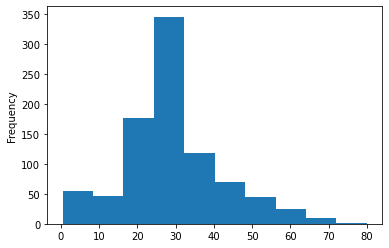

In [23]:
# Access the 'Age' column from the DataFrame using bracket notation and plot a histogram
# The plot() function is called on the 'Age' column, specifying the kind of plot as 'hist' for histogram
t["Age"].plot(kind='hist')

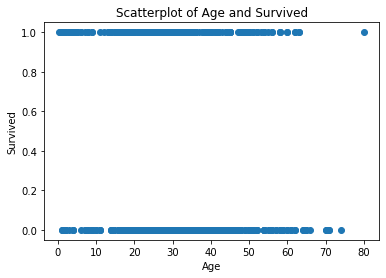

In [24]:
#Seeing relationship between Age and Survived using scatter plot

x=t['Age']
y=t['Survived']
plt.scatter(x,y)
plt.title("Scatterplot of Age and Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

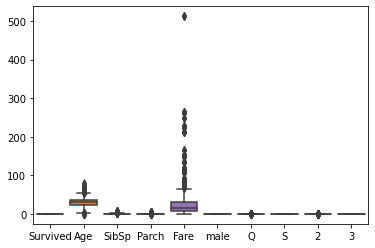

In [25]:
#Visualizing data using boxplot
sns.boxplot(data=t)

# PREDICITING ACCURACY USING MACHINE LEARNING ALGORITHMS


**Basic Steps:**

       1. Split the dataset into independent(X) and dependent(Y) datasets
       2. Split the dataset into training and testing
       3. Algorithms and Prediction
       4. Testing model accuracy

**Split the dataset into independent(X) and dependent(Y) datasets**

In [27]:
#Dividing data into X and Y(converting into numpy)
X=t.iloc[:,1:10].values  
Y=t.iloc[:,0].values   

In [28]:
print(X)

[[22.          1.          0.         ...  1.          0.
   1.        ]
 [38.          1.          0.         ...  0.          0.
   0.        ]
 [26.          0.          0.         ...  1.          0.
   1.        ]
 ...
 [29.69911765  1.          2.         ...  1.          0.
   1.        ]
 [26.          0.          0.         ...  0.          0.
   0.        ]
 [32.          0.          0.         ...  0.          0.
   1.        ]]


In [29]:
print(Y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

**Split the dataset into training and testing**

In [30]:
#TestSize=.2 because 20% data is for testing and the other 80% is for trainning the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


# LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel  = LogisticRegression()
logmodel.fit(X_train,  Y_train)

LogisticRegression()

In [32]:
pred_value = logmodel.predict(X_test) #PRINT THE PREDICITION MODEL
pred_value

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [34]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [35]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print("The accuracy of Logistic Resgression is (in %):", accuracy_score(Y_test, pred_value)*100)

The accuracy of Logistic Resgression is (in %): 82.12290502793296


# KNN CLASSIFIER

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
pred_knn = knn.predict(X_test)
pred_knn

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [40]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [41]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print("The accuracy of KNN classifier is (in %):", accuracy_score(Y_test, pred_knn)*100)

The accuracy of KNN classifier is (in %): 72.62569832402235


# RANDOM FOREST

In [42]:
#Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

#Create Classifier

rfc = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
pred_rf=rfc.predict(X_test )
pred_rf

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [44]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [49]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print("The accuracy of Random Forest is (in %):", accuracy_score(Y_test, pred_rf)*100)

The accuracy of Random Forest is (in %): 83.79888268156425


# DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier( )
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [47]:
pred_dt =dtree.predict(X_test)
pred_dt

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [48]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [50]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print("The accuracy of Decision Tree Classifier is (in %):", accuracy_score(Y_test, pred_dt)*100)

The accuracy of Decision Tree Classifier is (in %): 78.2122905027933


# NAVIE BAYES CLASSIFIER

In [51]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 

GaussianNB()

In [52]:
# making predictions on the testing set 
pred_nb = gnb.predict(X_test) 

In [53]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print("The accuracy of Navie bayes is (in %):", accuracy_score(Y_test, pred_nb)*100)

The accuracy of Navie bayes is (in %): 81.00558659217877
